In [70]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# MNIST 데이터

In [71]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [72]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [73]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [74]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

Saving figure some_digit_plot


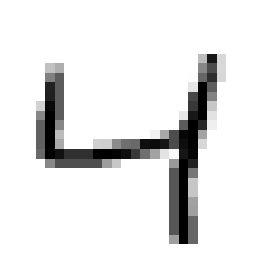

In [75]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[2]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [76]:
some_digit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [77]:
y = y.astype(np.uint8)

In [78]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [79]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [80]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


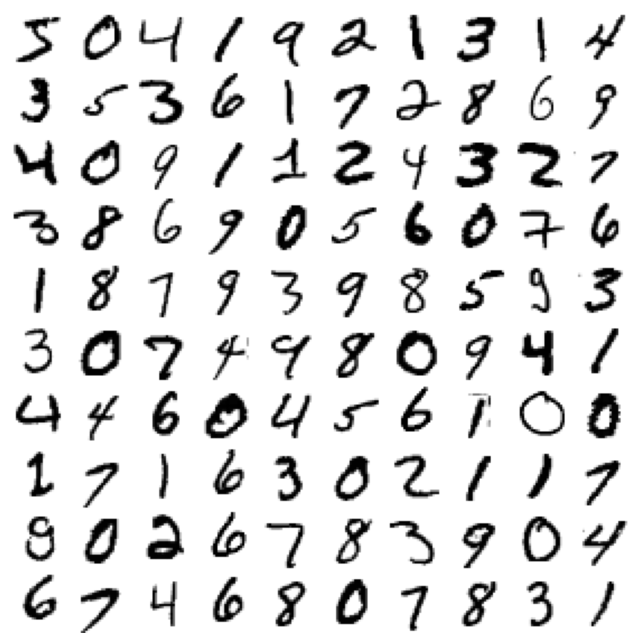

In [81]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [82]:
y[0]

5

In [83]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# 이진분류기 (Binary classifier)

문제를 단순화해서 숫자 5만 식별해보자.

In [84]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [85]:
y_train_5

array([ True, False, False, ...,  True, False, False])

로지스틱 회귀 모델을 사용해보자.

In [86]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(random_state=0).fit(X_train, y_train_5)

C:\Users\dongh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
log_clf.predict([X[0],X[1],X[2]])

array([ True, False, False])

교차 검증을 사용해서 평가해보자.

In [88]:
from sklearn.model_selection import cross_val_score
cross_val_score(log_clf, X_train, y_train_5, cv=3, scoring="accuracy")

C:\Users\dongh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dongh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.97525, 0.97325, 0.9732 ])

모든 교차 검증 폴드에 대해 정확도가 97% 이상임. 모델이 좋아 보이는가?

In [89]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros(len(X), dtype=bool)

In [90]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [91]:
never_5_clf.predict(X)

array([False, False, False, ..., False, False, False])

이미지의 10%만 숫자 5이기 때문에 무조건 5가 아닌 것으로 예측하면 정확도는 90%가 된다. 목표값(클래스)들이 불균형인 경우에 정확도(accuracy)는 좋은 지표가 아니다.

### 오차행렬 (Confusion matrix)

In [92]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(log_clf, X_train, y_train_5, cv=3)

C:\Users\dongh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dongh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [93]:
y_train_pred.shape

(60000,)

In [94]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[54039,   540],
       [ 1026,  4395]], dtype=int64)

<div>
<img src="images/fig3-2.png" width="600"/>
</div>

### precision = $\frac{TP}{TP+FP}$ (정밀도)

### recall = $\frac{TP}{TP+FN}$ (재현율)

In [95]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8905775075987842

In [96]:
4395/(4395+541)

0.8903970826580226

In [97]:
recall_score(y_train_5, y_train_pred)

0.8107360265633647

In [98]:
4395/(4395+1026)

0.8107360265633647

In [99]:
# 만약 무조건 5가 아니다라고 예측한다면?
confusion_matrix(y_train_5, never_5_clf.predict(X)[:60000]) 

array([[54579,     0],
       [ 5421,     0]], dtype=int64)

In [100]:
precision_score(y_train_5, never_5_clf.predict(X)[:60000])

C:\Users\dongh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [101]:
recall_score(y_train_5, never_5_clf.predict(X)[:60000])

0.0

##  Error cases 조사하기

In [102]:
errors = (y_train_pred != y_train_5)

In [103]:
errors

array([False, False, False, ..., False, False, False])

Saving figure more_digits_plot


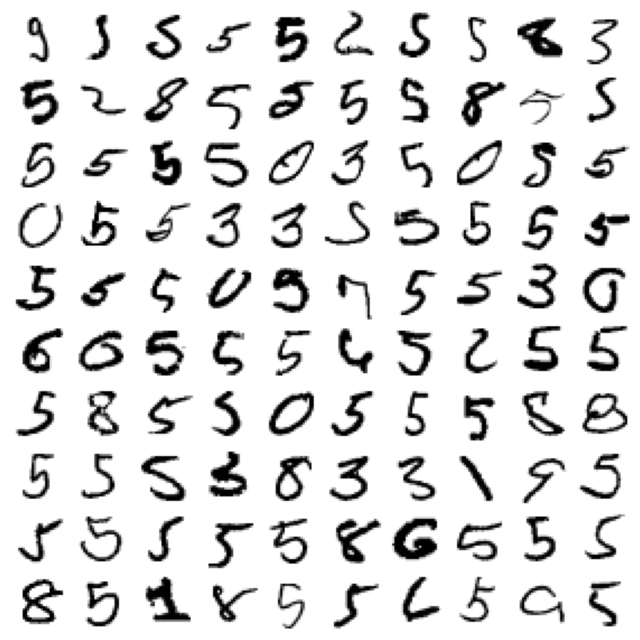

In [104]:
plt.figure(figsize=(9,9))
plot_digits(X_train[errors][:100], images_per_row=10)

save_fig("more_digits_plot")
plt.show()

## Precision/Recall Trade-off

$ $

<div>
<img src="images/fig3-3.png" width="700"/>
</div>

In [105]:
for i in range(len(errors)):
    if errors[i]:
        print(i)

48
132
138
173
244
262
278
502
528
540
554
558
559
610
635
690
748
769
778
832
836
899
916
924
1015
1021
1024
1029
1032
1089
1102
1104
1111
1145
1151
1222
1276
1278
1298
1311
1324
1325
1328
1346
1356
1376
1468
1587
1651
1682
1784
1930
1961
2000
2028
2148
2172
2184
2209
2211
2272
2302
2308
2368
2373
2395
2428
2566
2622
2636
2744
2758
2780
2803
2958
3013
3034
3070
3095
3204
3205
3216
3289
3401
3416
3502
3524
3580
3638
3648
3872
4004
4066
4148
4184
4192
4231
4304
4362
4416
4475
4562
4590
4596
4622
4645
4665
4666
4786
4801
4820
4847
4908
4941
5066
5080
5157
5177
5188
5250
5255
5303
5382
5506
5526
5554
5632
5666
5678
5737
5738
5752
5757
5771
5798
5839
5847
5857
5904
5925
5947
5956
6066
6086
6096
6106
6171
6236
6370
6418
6428
6450
6472
6504
6636
6644
6735
6836
6844
6848
6895
6920
6929
6943
7032
7044
7080
7112
7134
7216
7232
7270
7281
7286
7346
7354
7368
7374
7498
7544
7546
7584
7639
7833
7842
7884
7917
7962
8009
8062
8178
8190
8307
8339
8414
8419
8435
8488
8504
8549
8606
8623
8624
8639
8662


In [106]:
y_train_pred[48], y_train_5[48]

(True, False)

In [107]:
some_digit = X_train[48]

y_scores = log_clf.decision_function([some_digit])
y_scores

array([0.22419047])

Saving figure some_digit_plot


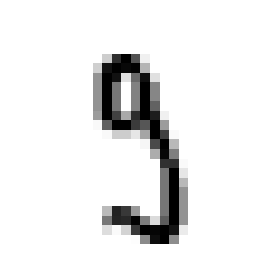

In [108]:
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [109]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [110]:
threshold = 0.5
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [111]:
y_scores = cross_val_predict(log_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

C:\Users\dongh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dongh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [112]:
y_scores.shape

(60000,)

In [113]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [114]:
precisions.shape

(59897,)

In [115]:
thresholds.shape

(59896,)

Saving figure precision_vs_recall_plot


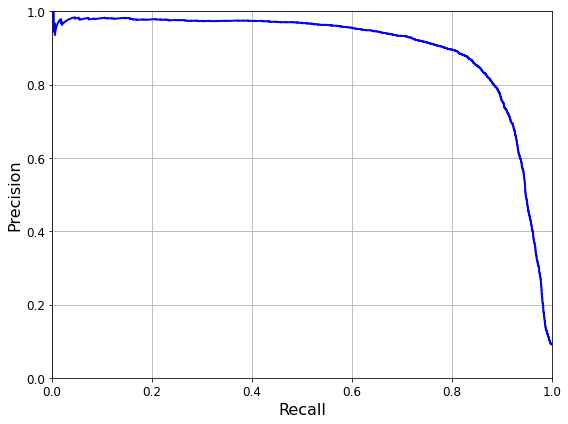

In [116]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot")
plt.show()

Threshold를 낮추면 Recall 상승, Precision 하락 <br>
Threshold를 높이면 Recall 하락, Precision 상승

## 다중 분류 (Multiclass Classification)

In [117]:
from sklearn.linear_model import LogisticRegression
# class의 갯수를 10개로
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X_train, y_train)

C:\Users\dongh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, multi_class='multinomial')

In [118]:
softmax_reg.predict(X_train)[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [119]:
from sklearn.metrics import accuracy_score
y_pred = softmax_reg.predict(X_test)
accuracy_score(y_test, y_pred)

0.9243

## Data Augmentation
변형을 통한 추가적 데이터 생성

In [120]:
from scipy.ndimage.interpolation import shift

In [121]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

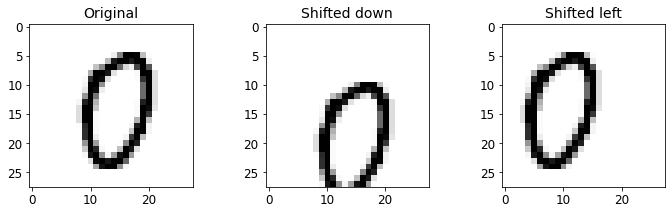

In [122]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5) # 아래쪽으로 이동
shifted_image_left = shift_image(image, -5, 0) # 왼쪽으로 이동

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [123]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

# label은 그대로!
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [124]:
X_train_augmented.shape

(300000, 784)

In [125]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [126]:
X_train_augmented.shape, X_train.shape

((300000, 784), (60000, 784))

In [127]:
softmax_reg_augmented = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg_augmented.fit(X_train_augmented, y_train_augmented)

C:\Users\dongh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10, multi_class='multinomial')

In [128]:
y_pred = softmax_reg_augmented.predict(X_test)
accuracy_score(y_test, y_pred)

0.9279

## Titanic 데이터셋

In [143]:
import numpy as np
import pandas as pd

In [144]:
train_data = pd.read_csv("titanic.csv")

In [145]:
train_data.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


속성들

* **Survived**: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
* **Pclass**: passenger class.
* **Name**, **Sex**, **Age**: self-explanatory
* **SibSp**: how many siblings & spouses of the passenger aboard the Titanic.
* **Parch**: how many children & parents of the passenger aboard the Titanic.
* **Ticket**: ticket id
* **Fare**: price paid (in pounds)
* **Cabin**: passenger's cabin number
* **Embarked**: where the passenger embarked the Titanic

In [146]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passengerid  1309 non-null   int64  
 1   Age          1309 non-null   float64
 2   Fare         1309 non-null   float64
 3   Sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  Parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

Age, Cabin, Embarked 속성들이 missing value를 가지고 있다.

Cabin, Name, Ticket 속성들은 무시한다.

In [147]:
train_data.describe()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.0,1309.0,1309.0,1309.0,1309.0,...,1309.0,1309.0,1309.0,1309.000000,1309.0,1309.0,1307.000000,1309.0,1309.0,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.294882,0.0,0.0,1.492731,0.0,0.0,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.837836,0.0,0.0,0.814626,0.0,0.0,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.000000,0.0,0.0,1.000000,0.0,0.0,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.000000,0.0,0.0,2.000000,0.0,0.0,1.000000


오직 40% 미만이 생존했음을 알 수 있다.

In [148]:
train_data["Survived"].value_counts()

0    967
1    342
Name: Survived, dtype: int64

Categorical 속성들을 조사해보자.

In [139]:
train_data["Pclass"].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [140]:
train_data["Sex"].value_counts()

0    843
1    466
Name: Sex, dtype: int64

In [141]:
train_data["Embarked"].value_counts()

2.0    914
0.0    270
1.0    123
Name: Embarked, dtype: int64

In [167]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

Numerical 속성을 처리하는 pipeline을 만든다.

In [168]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
        ("imputer", SimpleImputer(strategy="median")), # missing val은 median으로
    ])

In [169]:
num_pipeline.fit_transform(train_data)

KeyError: "['SibSp'] not in index"

In [170]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [171]:
from sklearn.preprocessing import OneHotEncoder

In [172]:
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked"])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [173]:
cat_pipeline.fit_transform(train_data)

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.]])

In [174]:
cat_pipeline.fit_transform(train_data)[0]

array([0., 0., 1., 1., 0., 0., 0., 1.])

Categorical, numerical 속성들을 통합한다.

In [175]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [176]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

KeyError: "['SibSp'] not in index"

In [177]:
X_train.shape

(60000, 784)

목표값 벡터

In [178]:
y_train = train_data["Survived"]

In [179]:
y_train

0       0
1       1
2       1
3       1
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: Survived, Length: 1309, dtype: int64

In [180]:
log_clf = LogisticRegression(random_state=0).fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [60000, 1309]

In [181]:
a = np.c_[log_clf.decision_function(X_train), y_train, X_train]

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 60000 and the array at index 1 has size 1309

In [182]:
df = pd.DataFrame(data=a, columns=["Score", "Survived", "Age", "SibSp", "Parch", "Fare", "Pclass_1", "Pclass_2", "Pclass_3", "Female", "Male", "Embarked_C", "Embarked_Q", "Embarked_S"])

NameError: name 'a' is not defined

In [183]:
df

NameError: name 'df' is not defined

In [184]:
df.sort_values(by=['Score'], ascending=False)[:20]

NameError: name 'df' is not defined

In [185]:
df.sort_values(by=['Score'])[:20]

NameError: name 'df' is not defined